# Mount To Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1: BMI Prediction (Regression Task)
Here the present BMI of a university student is predicted using the features height, weight difference of before and after COVID and BMI during Covid. Models implemented for this task are Linear Regression and SVR (Support Vector Regressor).

## Get The Data

In [ ]:
bmi=pd.read_excel('/content/drive/MyDrive/Machine_Learning_Dataset/BMI Calculation_MJH.xlsx')

### Take a Look at the Data Structure

In [ ]:
bmi.head()

,Feet,Inch,Hieght (cm),Hieght (m2),W1,W2,BMI (Before COVID),BMI (During COVID)
0,5,6.0,167.64,2.810317,70.0,78.0,24.908222,27.754876
1,5,1.0,154.94,2.400640,51.0,55.0,21.244332,22.910554
2,5,0.0,152.40,2.322576,44.0,49.0,18.944482,21.097264
3,5,1.0,154.94,2.400640,49.0,47.0,20.411221,19.578110
4,5,3.0,160.02,2.560640,75.0,78.0,29.289552,30.461134


In [ ]:
bmi['Weight_difference']=bmi['W2']-bmi['W1']

In [ ]:
bmi.rename(columns = {'Hieght (cm)':'Height'}, inplace = True)

In [ ]:
bmi=bmi.drop(['Feet', 'Inch','Hieght (m2)','W1','W2'], axis=1)

In [ ]:
bmi.head()

,Height,BMI (Before COVID),BMI (During COVID),Weight_difference
0,167.64,24.908222,27.754876,8.0
1,154.94,21.244332,22.910554,4.0
2,152.40,18.944482,21.097264,5.0
3,154.94,20.411221,19.578110,-2.0
4,160.02,29.289552,30.461134,3.0


### Create a Test Set

In [ ]:
X = bmi[bmi.columns.difference(['BMI (During COVID)'])]
y = bmi['BMI (During COVID)']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Split the data for train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

## Discover and Visualize the Data to Get Insights

### Visualization

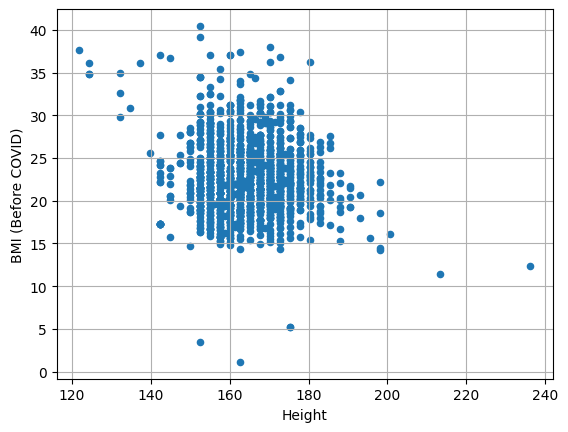

In [ ]:
bmi.plot(kind="scatter", x="Height", y="BMI (Before COVID)", grid=True)
plt.show()

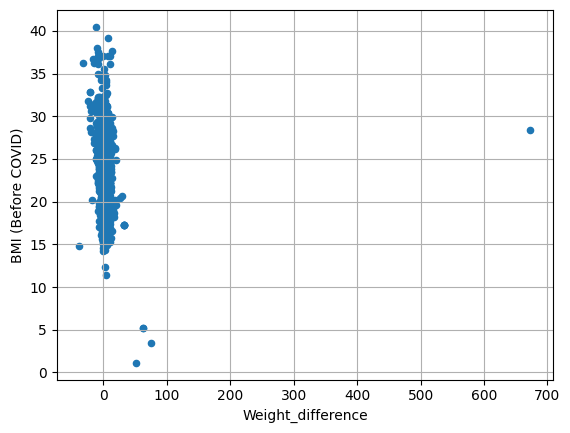

In [ ]:
bmi.plot(kind="scatter", x="Weight_difference", y="BMI (Before COVID)", grid=True)
plt.show()

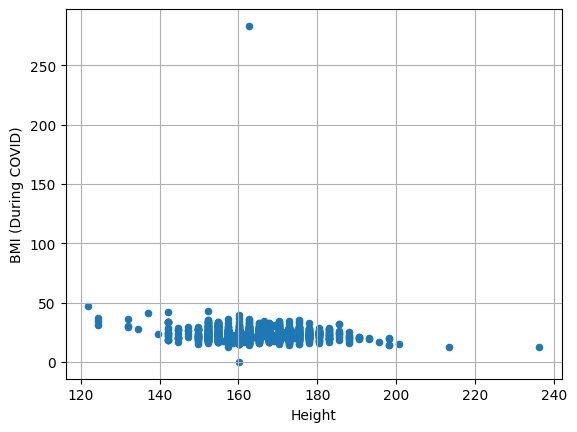

In [ ]:
bmi.plot(kind="scatter", x="Height", y="BMI (During COVID)", grid=True)
plt.show()

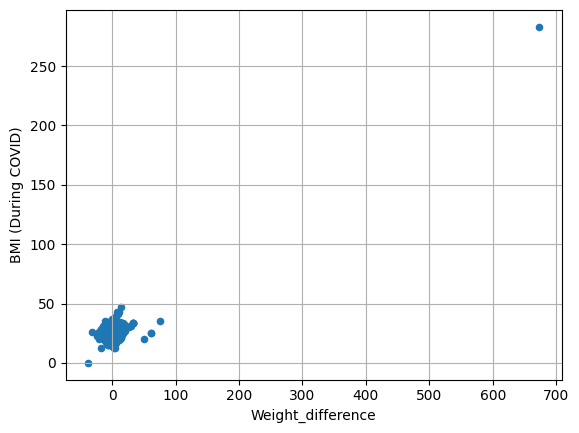

In [ ]:
bmi.plot(kind="scatter", x="Weight_difference", y="BMI (During COVID)", grid=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


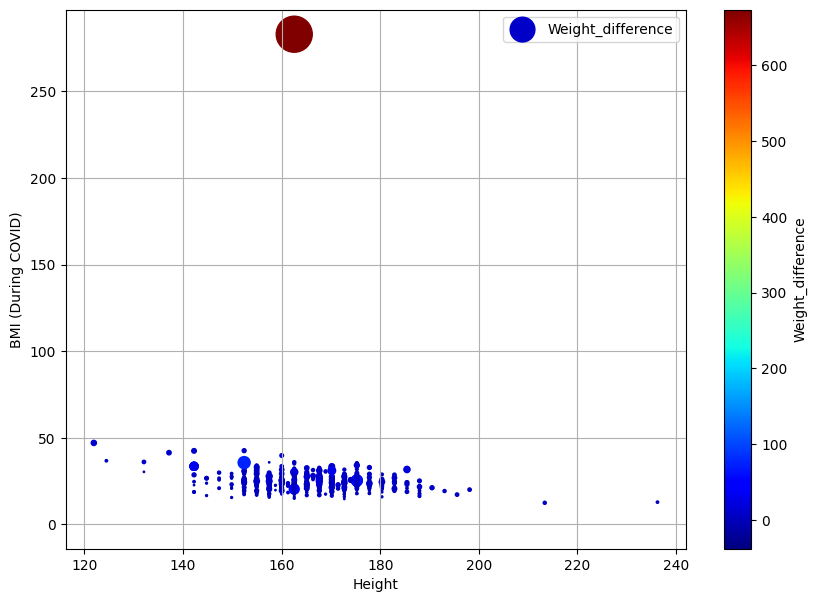

In [ ]:
bmi.plot(kind="scatter", x="Height", y="BMI (During COVID)", grid=True,
             s=bmi["Weight_difference"], label="Weight_difference",
             c="Weight_difference", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

### Looking For Correlations

In [ ]:
corr_matrix = bmi.corr()

In [ ]:
corr_matrix["Weight_difference"].sort_values(ascending=False)

Weight_difference     1.000000
BMI (During COVID)    0.842454
Height               -0.002854
BMI (Before COVID)   -0.078515
Name: Weight_difference, dtype: float64

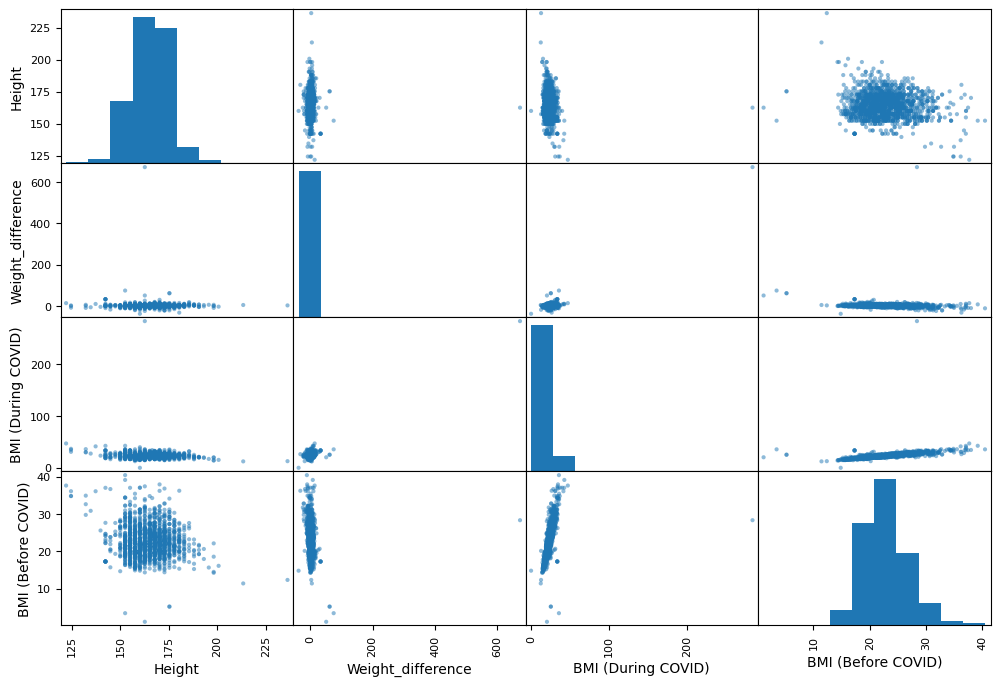

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Height", "Weight_difference", "BMI (During COVID)",
              "BMI (Before COVID)"]
scatter_matrix(bmi[attributes], figsize=(12, 8))
plt.show()

<Axes: >

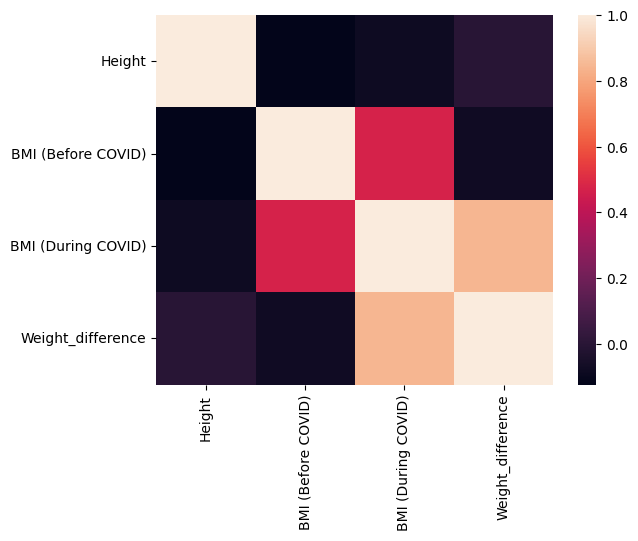

In [ ]:
sns.heatmap(bmi.corr())

## Prepare the Data for Machine Learning Algorithms

In [ ]:
X = bmi[bmi.columns.difference(['BMI (During COVID)'])]
y = bmi['BMI (During COVID)']

### Predicting Outliers

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [ ]:
outlier_pred

array([ 1,  1,  1, ...,  1, -1,  1])

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

bmi_num = bmi.select_dtypes(include=[np.number])
std_scaler = StandardScaler()
bmi_num_std_scaled = std_scaler.fit_transform(bmi_num)

In [ ]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(y.to_frame())

model = LinearRegression()
model.fit(bmi[["Height"]], scaled_labels)
some_new_data = bmi[["Height"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [ ]:
predictions

array([[23.31642326],
       [24.15535483],
       [24.32314114],
       [24.15535483],
       [23.8197822 ]])

In [ ]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(bmi[["Height"]], y)
predictions = model.predict(some_new_data)

In [ ]:
predictions

array([23.31642326, 24.15535483, 24.32314114, 24.15535483, 23.8197822 ])

### Transformation Pipelines

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [ ]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [ ]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
bmi_num_prepared = num_pipeline.fit_transform(bmi_num)
bmi_num_prepared[:2].round(2)

array([[ 0.33,  0.51,  0.55,  0.34],
       [-1.  , -0.38, -0.08,  0.11]])

In [ ]:
df_bmi_num_prepared = pd.DataFrame(
    bmi_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=bmi_num.index)

In [ ]:
df_bmi_num_prepared.head

<bound method NDFrame.head of         Height  BMI (Before COVID)  BMI (During COVID)  Weight_difference
0     0.332156            0.514523            0.551036           0.336845
1    -1.003136           -0.375497           -0.080062           0.113783
2    -1.270195           -0.934169           -0.316289           0.169549
3    -1.003136           -0.577874           -0.514198          -0.220810
4    -0.469019            1.578821            0.903596           0.058018
...        ...                 ...                 ...                ...
1597  1.133332           -0.158349           -0.053435           0.058018
1598  1.934507           -0.016107           -0.143342          -0.165044
1599  0.332156            0.255211           -0.144308          -0.332341
1600  2.735683           -0.850497           -0.300584           0.281080
1601 -0.469019            0.440434            0.038700          -0.220810

[1602 rows x 4 columns]>

In [ ]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number))
)

In [ ]:
bmi_prepared = preprocessing.fit_transform(bmi)

In [ ]:
bmi_prepared_fr = pd.DataFrame(
    bmi_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=bmi.index)
bmi_prepared_fr.head(2)

,pipeline__Height,pipeline__BMI (Before COVID),pipeline__BMI (During COVID),pipeline__Weight_difference
0,0.332156,0.514523,0.551036,0.336845
1,-1.003136,-0.375497,-0.080062,0.113783


In [ ]:
bmi_prepared = preprocessing.fit_transform(bmi)
bmi_prepared.shape

(1602, 4)

In [ ]:
preprocessing.get_feature_names_out()

array(['pipeline__Height', 'pipeline__BMI (Before COVID)',
       'pipeline__BMI (During COVID)', 'pipeline__Weight_difference'],
      dtype=object)

## Select and Model Train

### Linear Regression

#### Training and Evoulution on the Training Set

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b113e8cd630>)])),
                ('linearregression', LinearRegression())])

In [ ]:
bmi_predictions = lin_reg.predict(X)
bmi_predictions[:5]

array([27.89957198, 22.84845442, 20.95155219, 19.74287881, 30.46897597])

In [ ]:
error_ratios = bmi_predictions[:5] / y.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

0.5%, -0.3%, -0.7%, 0.8%, 0.0%


In [ ]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(y, bmi_predictions,
                              squared=False)
lin_rmse

0.35585322848107226

In [ ]:
from sklearn.metrics import r2_score
lin_r2_score = r2_score(y, bmi_predictions)
lin_r2_score

0.9978508376911608

### SVR

In [ ]:
from sklearn.svm import SVR

svr_reg = make_pipeline(preprocessing, SVR(kernel='linear'))
svr_reg.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b113e8cd630>)])),
                ('svr', SVR(kernel='linear'))])

In [ ]:
bmi_predictions = svr_reg.predict(X)
svr_rmse = mean_squared_error(y, bmi_predictions,
                              squared=False)
svr_rmse

0.35979283029103193

In [ ]:
from sklearn.metrics import r2_score
svr_r2_score = r2_score(y, bmi_predictions)
svr_r2_score

0.9978029881247242

### Better Evolution Using Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

lin_rmses = -cross_val_score(lin_reg, X, y,
                              scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(lin_rmses).describe()

count    10.000000
mean      0.325727
std       0.178869
min       0.166269
25%       0.227192
50%       0.258769
75%       0.372784
max       0.767187
dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score

svr_rmses = -cross_val_score(svr_reg, X, y,
                              scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(svr_rmses).describe()

count    10.000000
mean      0.350760
std       0.187897
min       0.162272
25%       0.229024
50%       0.264243
75%       0.444797
max       0.776719
dtype: float64

## Evaluating Model

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [ ]:
final_predictions = lin_reg.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

0.4530292756635535


In [ ]:
final_predictions = svr_reg.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

0.4633132330652317
